![Kayak](https://seekvectorlogo.com/wp-content/uploads/2018/01/kayak-vector-logo.png)

# Plan your trip with Kayak 

## Company's description 📇

<a href="https://www.kayak.com" target="_blank">Kayak</a> is a travel search engine that helps user plan their next trip at the best price.

The company was founded in 2004 by Steve Hafner & Paul M. English. After a few rounds of fundraising, Kayak was acquired by <a href="https://www.bookingholdings.com/" target="_blank">Booking Holdings</a> which now holds: 

* <a href="https://booking.com/" target="_blank">Booking.com</a>
* <a href="https://kayak.com/" target="_blank">Kayak</a>
* <a href="https://www.priceline.com/" target="_blank">Priceline</a>
* <a href="https://www.agoda.com/" target="_blank">Agoda</a>
* <a href="https://Rentalcars.com/" target="_blank">RentalCars</a>
* <a href="https://www.opentable.com/" target="_blank">OpenTable</a>

With over \$300 million revenue a year, Kayak operates in almost all countries and all languages to help their users book travels accros the globe. 

## Project 🚧

The marketing team needs help on a new project. After doing some user research, the team discovered that **70% of their users who are planning a trip would like to have more information about the destination they are going to**. 

In addition, user research shows that **people tend to be defiant about the information they are reading if they don't know the brand** which produced the content. 

Therefore, Kayak Marketing Team would like to create an application that will recommend where people should plan their next holidays. The application should be based on real data about:

* Weather 
* Hotels in the area 

The application should then be able to recommend the best destinations and hotels based on the above variables at any given time. 

## Goals 🎯

As the project has just started, your team doesn't have any data that can be used to create this application. Therefore, your job will be to: 

* Scrape data from destinations 
* Get weather data from each destination 
* Get hotels' info about each destination
* Store all the information above in a data lake
* Extract, transform and load cleaned data from your datalake to a data warehouse

## Scope of this project 🖼️

Marketing team wants to focus first on the best cities to travel to in France. According <a href="https://one-week-in.com/35-cities-to-visit-in-france/" target="_blank">One Week In.com</a> here are the top-35 cities to visit in France: 

```python 
["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]
```

Your team should focus **only on the above cities for your project**. 


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you

### Get weather data with an API 

*   Use https://nominatim.org/ to get the gps coordinates of all the cities (no subscription required) Documentation : https://nominatim.org/release-docs/develop/api/Search/

*   Use https://openweathermap.org/appid (you have to subscribe to get a free apikey) and https://openweathermap.org/api/one-call-api to get some information about the weather for the 35 cities and put it in a DataFrame

*   Determine the list of cities where the weather will be the nicest within the next 7 days For example, you can use the values of daily.pop and daily.rain to compute the expected volume of rain within the next 7 days... But it's only an example, actually you can have different opinions on a what a nice weather would be like 😎 Maybe the most important criterion for you is the temperature or humidity, so feel free to change the rules !

*   Save all the results in a `.csv` file, you will use it later 😉 You can save all the informations that seem important to you ! Don't forget to save the name of the cities, and also to create a column containing a unique identifier (id) of each city (this is important for what's next in the project)

*   Use plotly to display the best destinations on a map

### Scrape Booking.com 

Since BookingHoldings doesn't have aggregated databases, it will be much faster to scrape data directly from booking.com 

You can scrap as many information asyou want, but we suggest that you get at least:

*   hotel name,
*   Url to its booking.com page,
*   Its coordinates: latitude and longitude
*   Score given by the website users
*   Text description of the hotel


### Create your data lake using S3 

Once you managed to build your dataset, you should store into S3 as a csv file. 

### ETL 

Once you uploaded your data onto S3, it will be better for the next data analysis team to extract clean data directly from a Data Warehouse. Therefore, create a SQL Database using AWS RDS, extract your data from S3 and store it in your newly created DB. 

## Deliverable 📬

To complete this project, your team should deliver:

* A `.csv` file in an S3 bucket containing enriched information about weather and hotels for each french city

* A SQL Database where we should be able to get the same cleaned data from S3 

* Two maps where you should have a Top-5 destinations and a Top-20 hotels in the area. You can use plotly or any other library to do so. It should look something like this: 

![Map](https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Kayak_best_destination_project.png)

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json

In [16]:
cities=["Mont-Saint-Michel",
"St-Malo",
"Bayeux",
"Le-Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau-du-Haut-Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges-du-Verdon",
"Bormes-les-Mimosas",
"Cassis",
"Marseille",
"Aix-en-Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues-Mortes",
"Saintes-Maries-de-la-mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La-Rochelle"]

In [17]:
#Ici on récupère les coordonnées gps des villes grâce à l'api nominatim

localisation=[]

for town in cities :
  url="https://nominatim.openstreetmap.org/search/"+town+"?format=json&addressdetails=1&limit=1&polygon_svg=1"
  r=requests.get(url)
  data_json=r.json()
  lat_json=data_json[0]['lat']
  lon_json=data_json[0]['lon']
  data = {"lat_lon":[
                     {"lat":lat_json,
                      "lon":lon_json}
                    ],
          "town":town      
  }
  localisation.append(data)

In [61]:
#Ici on récupère les données météo des différentes villes depuis l'api openweathermap

days=[]
min_temps=[]
max_temps=[]
weather_temps=[]
city_temps=[]
lats=[]
lons=[]


for i in range (0,len(localisation)):
  lat_gps=localisation[i]['lat_lon'][0]['lat']
  lon_gps=localisation[i]['lat_lon'][0]['lon']
  city_name=localisation[i]['town']
  
  url_meteo="https://api.openweathermap.org/data/2.5/onecall?lat="+lat_gps+"&lon="+lon_gps+"&units=metric&exclude=hourly,current,minutely,alerts&appid=f2c6f39babfa76ba85966581ec5450ab"
  r_meteo=requests.get(url_meteo)
  data_meteo=r_meteo.json()
  j=0
  for x in range(1,7):
    max_temp=data_meteo["daily"][x]['temp']['max']
    min_temp=data_meteo["daily"][x]['temp']['min']
    weather_temp=data_meteo["daily"][x]['weather'][0]['main']
    j+=1
    day="j+"+str(j)
    days.append(j) 
    min_temps.append(min_temp)
    max_temps.append(max_temp)
    weather_temps.append(weather_temp)
    city_temps.append(city_name)
    lats.append(lat_gps)
    lons.append(lon_gps)    

In [99]:
df_meteo = pd.DataFrame(list(zip(city_temps,days, min_temps,max_temps,weather_temps,lats,lons)),
               columns =['cities','days', 'max_temp','min_temp','weather','lat','lon'])
df_meteo['lat']=df_meteo['lat'].astype(float)
df_meteo['lon']=df_meteo['lon'].astype(float)

In [100]:
df_meteo.to_csv("city_temp.csv", index=True,encoding="utf-8-sig")

In [101]:
df_meteo.head()

,cities,days,max_temp,min_temp,weather,lat,lon
0,Mont-Saint-Michel,1,2.56,8.12,Clouds,48.635954,-1.51146
1,Mont-Saint-Michel,2,0.31,6.75,Clouds,48.635954,-1.51146
2,Mont-Saint-Michel,3,-0.30,5.82,Clouds,48.635954,-1.51146
3,Mont-Saint-Michel,4,3.91,11.65,Rain,48.635954,-1.51146
4,Mont-Saint-Michel,5,6.63,10.40,Rain,48.635954,-1.51146


In [102]:
gp_meteo=df_meteo.groupby(['days','cities','lat','lon'], as_index=False).agg({'max_temp':'mean','min_temp':'mean'}).sort_values(['days','cities'],ascending=True)

In [103]:
def normalize (val):
    if val<0:
        x=0
    else:
        x=val
    return x
gp_meteo['max_temp2']=gp_meteo['max_temp'].apply(normalize)
gp_meteo['min_temp2']=gp_meteo['min_temp'].apply(normalize)
gp_meteo.head()

,days,cities,lat,lon,max_temp,min_temp,max_temp2,min_temp2
0,1,Aigues-Mortes,43.565823,4.191284,4.99,9.60,4.99,9.60
1,1,Aix-en-Provence,43.529842,5.447474,3.56,8.05,3.56,8.05
2,1,Amiens,49.894171,2.295695,1.70,7.26,1.70,7.26
3,1,Annecy,45.899235,6.128885,-3.71,3.92,0.00,3.92
4,1,Ariege,42.945537,1.406554,-0.77,7.47,0.00,7.47


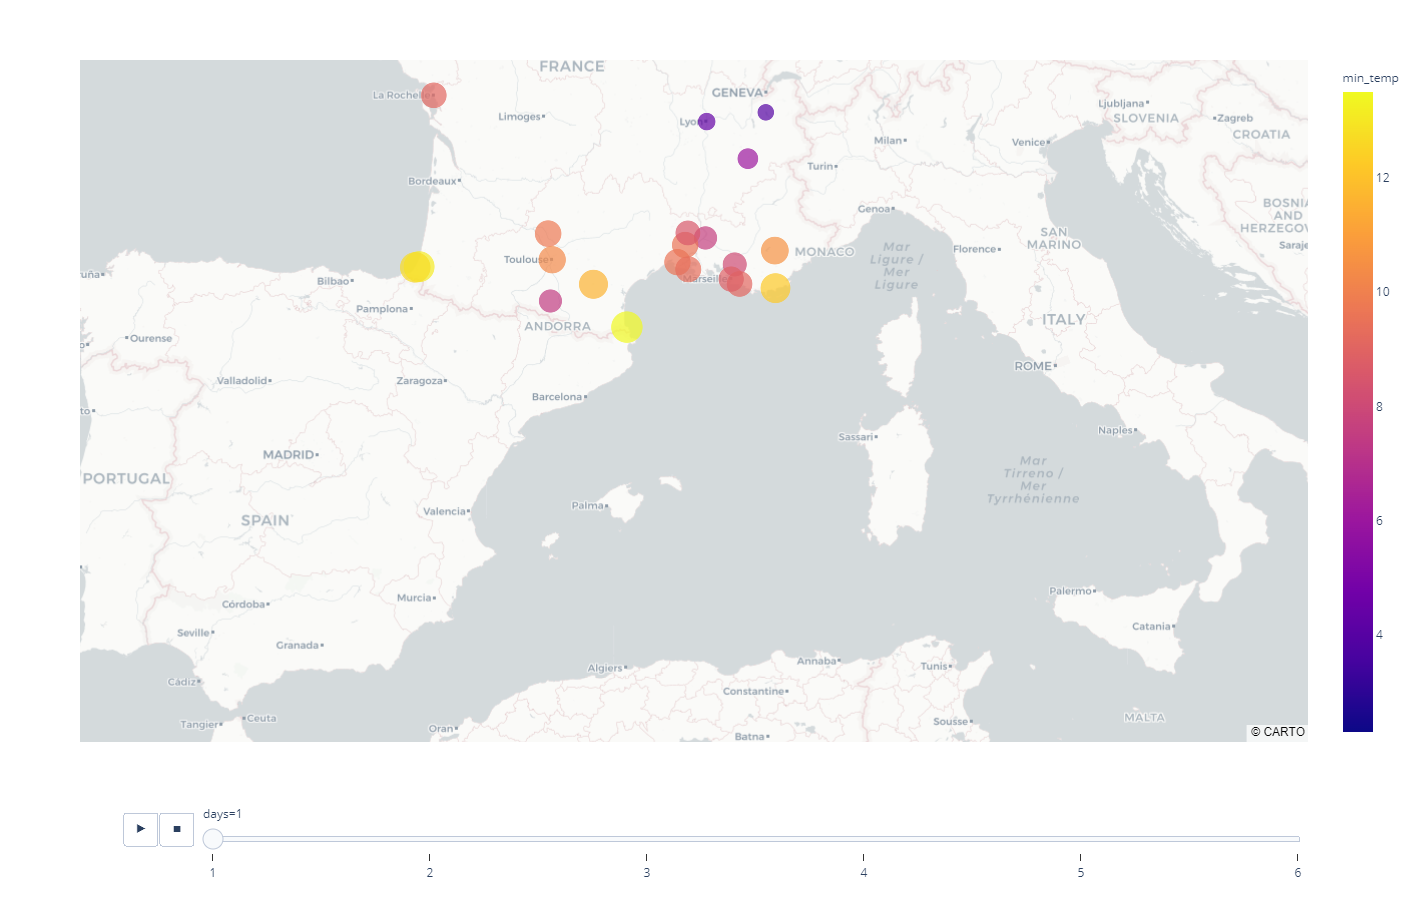

In [104]:
import plotly.express as px
fig = px.scatter_mapbox(gp_meteo, lat="lat", lon="lon",mapbox_style='carto-positron',color="min_temp",hover_name="cities",size='min_temp2',size_max=25, zoom=5,
                       animation_frame="days")
fig.update_layout(
    autosize=True,
    width=900,
    height=900,)
fig.show()

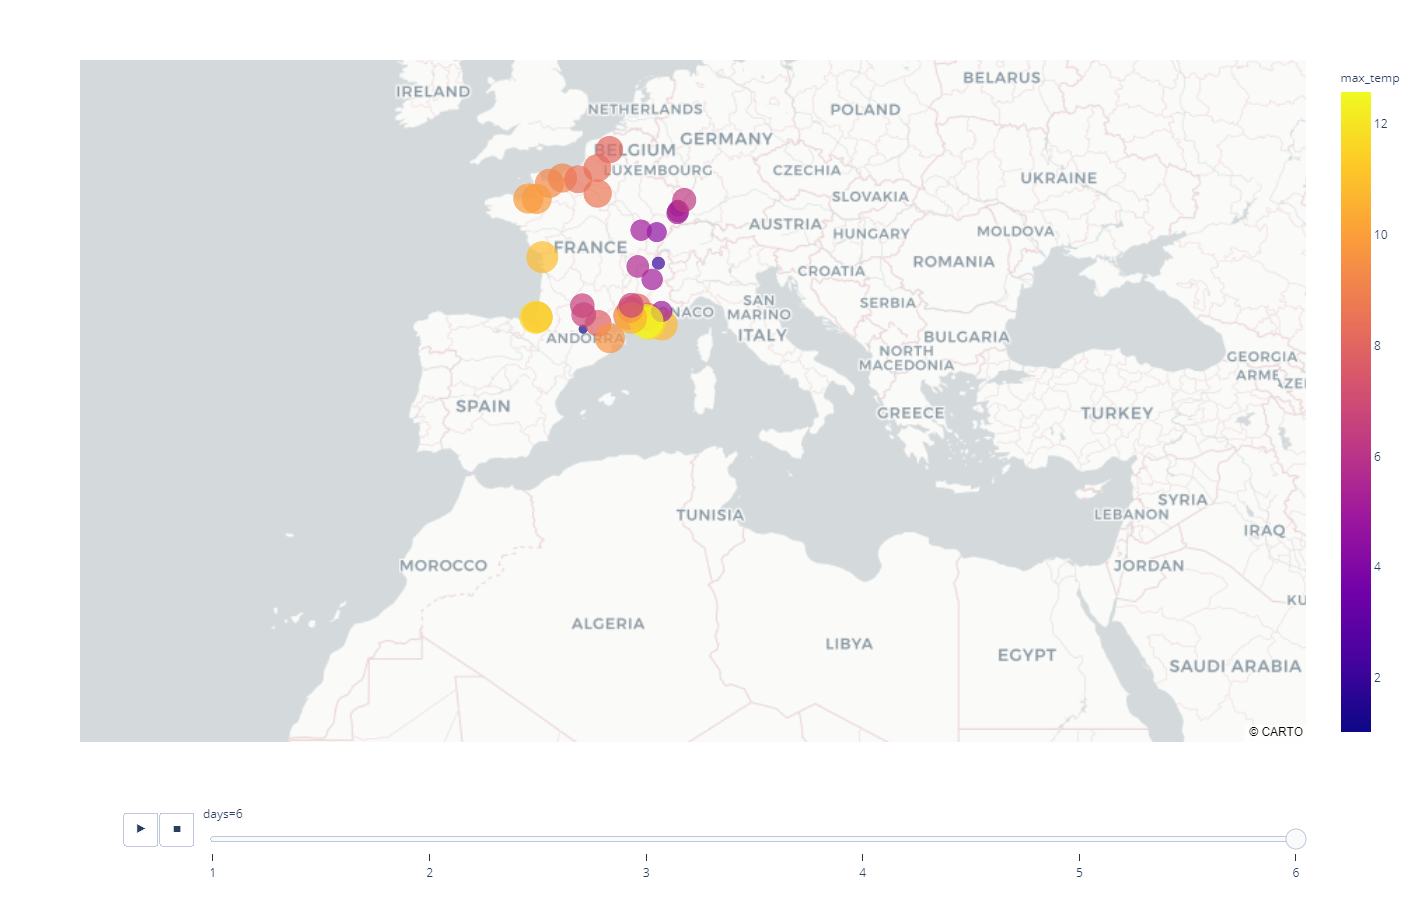

In [98]:
import plotly.express as px
fig = px.scatter_mapbox(gp_meteo, lat="lat", lon="lon",mapbox_style='carto-positron',color="max_temp",hover_name="cities",size='max_temp2',size_max=25, zoom=5,
                       animation_frame="days")
fig.update_layout(
    autosize=True,
    width=900,
    height=900,)
fig.show()

In [12]:
#Script pour récupérer les informations sur les hôtels pour chaque ville

hotels=[]

for town in cities:
    i=2
    x=0
    while i>x:
        if x==0:
            url = "https://www.booking.com/searchresults.fr.html?ss="+town
            navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
            html = requests.get(url, headers={'User-Agent': navigator})
            soup = BeautifulSoup(html.text,'html.parser')
            print(soup)

            anchors_names = soup.select('div.sr-hotel__title-wrap h3 a span.sr-hotel__name')
            names = [anchors_names[x].get_text().replace('\n','') for x in range (0,len(anchors_names))]
            x=len(names)
            #print(town," names hotel:",len(names))
          # print(url)
          # print(names)
            print("---------------------------------------------------------------------------------")

            anchors_rating = soup.select('div.sr-review-score a div div.bui-review-score__badge')
            ratings = [anchors_rating[x].get_text() for x in range (0,len(anchors_rating))]

            anchors_coord = soup.select('div.sr_card_address_line a')
            coord = [x.get('data-coords') for x in anchors_coord]

            anchors_desc = soup.select('div.hotel_desc')
            desc = [anchors_desc [x].get_text().replace('\n','') for x in range (0,len(anchors_desc ))]

            anchors_links = soup.select('div.sr-hotel__title-wrap h3 a')
            links = ["www.booking.com"+x.get('href').replace('\n','') for x in anchors_links]

    for i in range (0,10):
        data = {"info":[
                    {"hotel_names": names[i],
                    "rating": ratings[i],
                    "coordinates": coord[i],
                    "description": desc[i],
                    "links": links[i]}],
            "town" : town}
    hotels.append(data)

In [ ]:
df=pd.json_normalize(hotels,record_path='info',meta=['town'])
df

,hotel_names,rating,coordinates,description,links,town
0,Hôtel Vert,"8,1","-1.50961697101593,48.6147004862904","Situé à 2 km du Mont-Saint-Michel, sur la côte...",www.booking.com/hotel/fr/vert.fr.html?label=ge...,Mont-Saint-Michel
1,Mercure Mont Saint Michel,"8,2","-1.51054501533508,48.6142465295929",Installé dans des espaces verts à seulement 2 ...,www.booking.com/hotel/fr/mont-saint-michel.fr....,Mont-Saint-Michel
2,Hotel De La Digue,"7,1","-1.51091784238815,48.6168815494412",L'hôtel De La Digue est un établissement tradi...,www.booking.com/hotel/fr/de-la-digue.fr.html?l...,Mont-Saint-Michel
3,Le Saint Aubert,"7,4","-1.51010513305664,48.6129378347065","Niché dans un écrin de verdure, à seulement 2 ...",www.booking.com/hotel/fr/hotel-saint-aubert.fr...,Mont-Saint-Michel
4,La Vieille Auberge,"7,4","-1.511457,48.636063",La Vieille Auberge vous accueille dans le vill...,www.booking.com/hotel/fr/la-vieille-auberge-le...,Mont-Saint-Michel
...,...,...,...,...,...,...
345,Hôtel Les Gens de Mer La Rochelle by Popinns**,"7,9","-1.14749924709031,46.154126962049",Situé à 150 mètres de la gare et à 300 mètres ...,www.booking.com/hotel/fr/les-gens-de-mer-la-ro...,La-Rochelle
346,ATHOME RESIDENCE ET SPA,"8,2","-1.152398,46.145995","Situé à La Rochelle, l'établissement ATHOME RE...",www.booking.com/hotel/fr/athome-residence-et-s...,La-Rochelle
347,Hôtel Le Transatlantique - Lycée Hôtelier La R...,"8,8","-1.160263,46.143734","Situé à La Rochelle, à 2,5 km du parc des expo...",www.booking.com/hotel/fr/lycee-hotelier-la-roc...,La-Rochelle
348,Hôtel Le Rochelois,"8,1","-1.18243652016827,46.1541817473943",L'Hôtel Le Rochelois possède une piscine extér...,www.booking.com/hotel/fr/le-rochelois.fr.html?...,La-Rochelle


In [ ]:
df.to_csv("kayakv1.csv", index=False,encoding="utf-8-sig")

In [3]:
df = pd.read_csv('kayakv1.csv')
df.head()

,hotel_names,rating,coordinates,description,links,town
0,ibis budget Carcassonne La Cité,7.7,"2.37880825996399,43.2076548087517",L'ibis budget Carcassonne La Cité est situé à ...,www.booking.com/hotel/fr/ibis-budget-carcasson...,Carcassonne
1,SOWELL HOTELS Les Chevaliers,8.3,"2.35819995221902,43.2110324447747","Situé à Carcassonne, à 2 minutes à pied de l'A...",www.booking.com/hotel/fr/soleil-vacances-les-c...,Carcassonne
2,ibis Carcassonne Est la Cité,8.1,"2.38674759864807,43.2092520235757",L'ibis Carcassonne Est la Cité se trouve à 5 m...,www.booking.com/hotel/fr/ibis-berriac-2.fr.htm...,Carcassonne
3,ibis budget Carcassonne Aéroport - A61,7.9,"2.31039047241211,43.2045189067021",L'ibis budget Carcassonne Aéroport vous accuei...,www.booking.com/hotel/fr/etap-carcassonne-aero...,Carcassonne
4,Hotel Espace Cite,8.6,"2.36776024103165,43.2083546950589","Doté d'une connexion Wi-Fi gratuite, l'Hotel E...",www.booking.com/hotel/fr/inter-espace-cite.fr....,Carcassonne


In [13]:
import os
import boto3
import pandas as pd
import sys

if sys.version_info[0] < 3: 
    from StringIO import StringIO # Python 2.x
else:
    from io import StringIO # Python 3.x

# get your credentials from environment variables
aws_id = ''
aws_secret = ''

client = boto3.client('s3', aws_access_key_id=aws_id,
        aws_secret_access_key=aws_secret)

bucket_name = 'wine-yame-project'

object_key = 'kayakv1.csv'
csv_obj = client.get_object(Bucket=bucket_name, Key=object_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_motel = pd.read_csv(StringIO(csv_string))

In [14]:
object_key = 'city_temp.csv'
csv_obj = client.get_object(Bucket=bucket_name, Key=object_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_weather = pd.read_csv(StringIO(csv_string))

In [11]:
df_motel

,hotel_names,rating,coordinates,description,links,town
0,ibis budget Carcassonne La Cité,7.7,"2.37880825996399,43.2076548087517",L'ibis budget Carcassonne La Cité est situé à ...,www.booking.com/hotel/fr/ibis-budget-carcasson...,Carcassonne
1,SOWELL HOTELS Les Chevaliers,8.3,"2.35819995221902,43.2110324447747","Situé à Carcassonne, à 2 minutes à pied de l'A...",www.booking.com/hotel/fr/soleil-vacances-les-c...,Carcassonne
2,ibis Carcassonne Est la Cité,8.1,"2.38674759864807,43.2092520235757",L'ibis Carcassonne Est la Cité se trouve à 5 m...,www.booking.com/hotel/fr/ibis-berriac-2.fr.htm...,Carcassonne
3,ibis budget Carcassonne Aéroport - A61,7.9,"2.31039047241211,43.2045189067021",L'ibis budget Carcassonne Aéroport vous accuei...,www.booking.com/hotel/fr/etap-carcassonne-aero...,Carcassonne
4,Hotel Espace Cite,8.6,"2.36776024103165,43.2083546950589","Doté d'une connexion Wi-Fi gratuite, l'Hotel E...",www.booking.com/hotel/fr/inter-espace-cite.fr....,Carcassonne
...,...,...,...,...,...,...
515,Séjours & Affaires La Rochelle Les Minimes,7.5,"-1.15611791610718,46.1458449261902",Le Séjours & Affaires La Rochelle Les Minimes ...,www.booking.com/hotel/fr/residence-les-minimes...,La-Rochelle
516,ATHOME RESIDENCE ET SPA,8.2,"-1.152398,46.145995","Situé à La Rochelle, l'établissement ATHOME RE...",www.booking.com/hotel/fr/athome-residence-et-s...,La-Rochelle
517,Hôtel Les Gens de Mer La Rochelle by Popinns**,7.9,"-1.14749924709031,46.154126962049",Situé à 150 mètres de la gare et à 300 mètres ...,www.booking.com/hotel/fr/les-gens-de-mer-la-ro...,La-Rochelle
518,Résidence New Rochelle,7.7,"-1.16616010633152,46.1406899647635",La Résidence New Rochelle est située près du p...,www.booking.com/hotel/fr/residence-du-port.fr....,La-Rochelle


In [15]:
df_weather

,Unnamed: 0,cities,days,max_temp,min_temp,weather,lat,lon
0,0,Mont-Saint-Michel,1,2.56,8.12,Clouds,48.635954,-1.511460
1,1,Mont-Saint-Michel,2,0.31,6.75,Clouds,48.635954,-1.511460
2,2,Mont-Saint-Michel,3,-0.30,5.82,Clouds,48.635954,-1.511460
3,3,Mont-Saint-Michel,4,3.91,11.65,Rain,48.635954,-1.511460
4,4,Mont-Saint-Michel,5,6.63,10.40,Rain,48.635954,-1.511460
...,...,...,...,...,...,...,...,...
205,205,La-Rochelle,2,2.68,7.36,Clouds,46.159113,-1.152043
206,206,La-Rochelle,3,3.76,10.90,Clouds,46.159113,-1.152043
207,207,La-Rochelle,4,8.76,12.00,Rain,46.159113,-1.152043
208,208,La-Rochelle,5,9.88,12.19,Rain,46.159113,-1.152043
